# Sympy 2 -- Application to Newton's method

In this notebook we will focus on applying Sympy to accomplish a task. We will use it to set up Newton's method, comparing our initial point to the roots Newton's method (eventually) finds.

* * * 

Newton's method is the technique of iteratively using the linear approximation of a function to search for roots.  Say we want to find a solution to the equation

$$f(x) = 0$$

where, $f$ is a real-valued function of a real variable $f : \mathbb R \to \mathbb R$.

Start with an initial guess $x_0 \in \mathbb R$. The linear approximation $L$ at $x_0$ (to $f$) is the function

$$L_{x_0}(x) = f(x_0) + f'(x_0)(x-x_0).$$

Rather than trying to solve $f(x)=0$ we solve $L_{x_0}(x)=0$, which gives us

$$x = x_0-\frac{f(x_0)}{f'(x_0)}.$$

Newton's method is the process of replacing the initial guess $x_0$ with the solution to $L_{x_0}(x) = 0$, i.e. 

$$x_0 \longmapsto x_0-\frac{f(x_0)}{f'(x_0)}.$$

The function that sends $x_0$ to $x_0 -\frac{f(x_0)}{f'(x_0)}$ is called the **Newton iterate**, let's call this function $N_f$, i.e.

$$N_f(x) = x - \frac{f(x)}{f'(x)}.$$

* * *

For example, if $f(x) = x^2 - c$, then solving $f(x) = 0$ is equivalent to computing a square root of $c$.  On the other hand, the *Newton iterate* is the function

$$N_f(x) = x - \frac{x^2 - c}{2x} = \frac{x}{2} + \frac{c}{2x}.$$

This illustrates the compromise made with Newton's method: if one does not have a convenient direct way to compute square roots, one can get a good approximation by iteratively computing $N_f$, which uses only the operations of addition, multiplication and division. 

* * *

As an initial exercise, let's use Sympy to compute the Newton iterates of functions.  We will then make a plot of $f$, $N$ as well as applications of the Newton iterate to some initial guesses. 


In [3]:
import sympy as sp

f = sp.Function('f')
x = sp.Symbol('x')
N = x - f(x)/f(x).diff(x)
print("Newton iterate")
sp.pprint(N)

print("\nLet's make f = x^2 - c")
c = sp.Symbol('c')
Nsq = sp.simplify(N.subs(f(x), x**2 - c).doit())
sp.pprint(sp.Eq(sp.Symbol('N'), Nsq))

print("\nAnd let's set c=2 and iterate")
Nsq2 = Nsq.subs(c, 2)
sp.pprint(Nsq2)

## make callable the iterator, IT
IT = sp.lambdify(x, Nsq2)
xi = 1.0
print("\n")
for i in range(10):
    print("Iterate", i, "=", xi)
    xi = IT(xi)
    
print("\nxi^2 =", xi*xi)

Newton iterate
      f(x)  
x - ────────
    d       
    ──(f(x))
    dx      

Let's make f = x^2 - c
         2
    c + x 
N = ──────
     2⋅x  

And let's set c=2 and iterate
 2    
x  + 2
──────
 2⋅x  


Iterate 0 = 1.0
Iterate 1 = 1.5
Iterate 2 = 1.4166666666666667
Iterate 3 = 1.4142156862745099
Iterate 4 = 1.4142135623746899
Iterate 5 = 1.414213562373095
Iterate 6 = 1.414213562373095
Iterate 7 = 1.414213562373095
Iterate 8 = 1.414213562373095
Iterate 9 = 1.414213562373095

xi^2 = 1.9999999999999996


Let's set up a plotting function that takes as input a function $f$ and an initial value $c$, and plots both $f$, $N$ and several Newton iterates, i.e. 

$$c, N(c), N(N(c)), \cdots $$


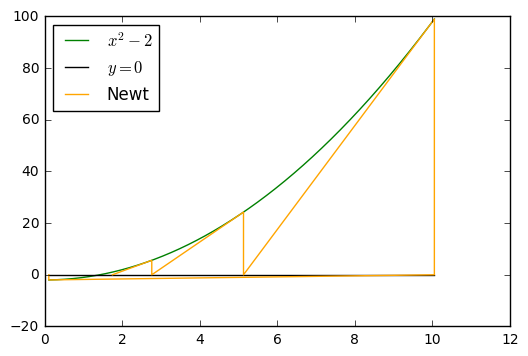

In [4]:
## make f callable as well
F = sp.lambdify(x, x**2 - 2)

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


fig, ax = plt.subplots()

xl = [0.1]
yl = [0.0]
for i in range(4):
    xl.append(xl[-1])
    yl.append(F(xl[-1]))
    xl.append(IT(xl[-1]))
    yl.append(0.0)
    
dom = np.linspace(min(xl), max(xl), 1000)
#plt.plot(dom, [x for x in dom], color="red", label="$x=y$")
plt.plot(dom, [F(x) for x in dom], color="green", label="$x^2 - 2$")
#plt.plot(dom, [IT(x) for x in dom], color="black", label="Newton Iterator")
plt.plot(dom, [0.0 for x in dom], color="black", label="$y=0$")


plt.plot(xl,yl, color="orange", label="Newt")
    
legend = ax.legend(loc='upper left')

plt.show()


In [33]:
## now let's make all of the above into a callable function. We
## give it the initial value and function, and it plots Newton's
## method.

## f = sympy function of x
## x = variable name
## x0 = variable initial value
## n == max number of iterations
def plotNewt(f, x, x0, n):
    N = x - f/f.diff(x)
    IT = sp.lambdify(x, N)
    F = sp.lambdify(x, f)
    
    plt.close() ## close previous plot
    fig, ax = plt.subplots()

    xl = [x0]
    yl = [0.0]
    for i in range(n):
        xl.append(xl[-1])
        yl.append(F(xl[-1]))
        xl.append(IT(xl[-1]))
        yl.append(0.0)
    
    dom = np.linspace(min(xl)-0.5, max(xl)+0.5, 1000)
    plt.plot(dom, [F(x) for x in dom], 'go', markersize=1, \
             markeredgewidth=0.0, label="$"+sp.latex(f)+"$")
    plt.plot(dom, [0.0 for x in dom], color="black",\
             label="$y=0$")
    plt.plot([x0], [0.0], 'ro', label="init")
    plt.plot(xl,yl, color="orange", label="Newt")
    
    legend = ax.legend(loc='upper left')

    plt.show()

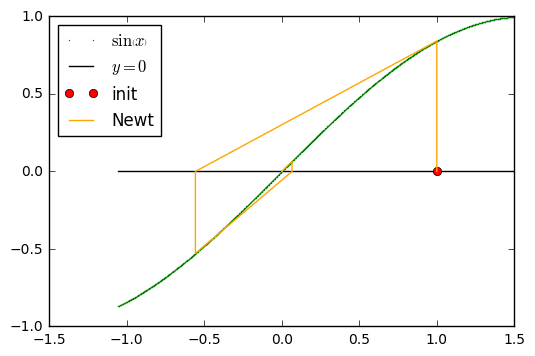

In [34]:
plotNewt(sp.sin(x), x, 1.0, 8)

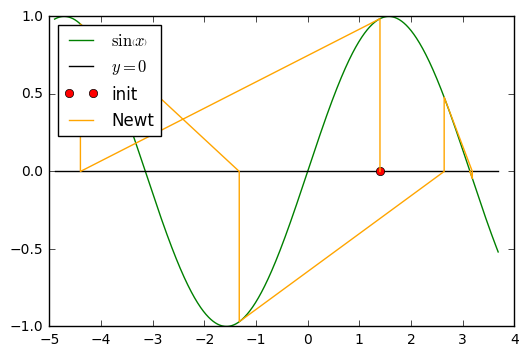

In [15]:
plotNewt(sp.sin(x), x, 1.4, 10)

From our observations, it would appear that if you start with $x_0$ close-enough to a root, Newton's method converges to that root.  But if $x_0$ is far-enough from all the roots, it is difficult to predict which root it converges to (if it converges at all!), especially when the derivative is small. 

Your lab assignment will be to make a plot of $x_0$ vs. the root that Newton's method converges to.  See if you can spot a pattern. 

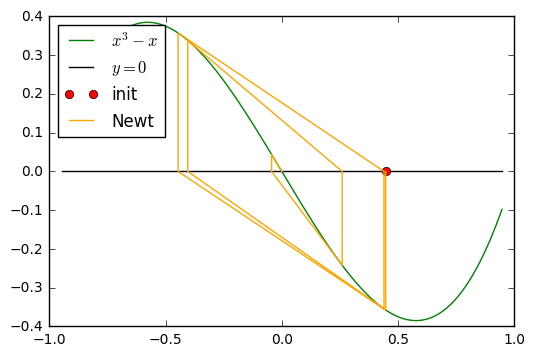

In [16]:
plotNewt(x**3-x, x, 0.447, 20)